## Exploration 4

### Goals of this exploration
* Based on user specified criteria of brands and/or product names, filter the rows and display stats of the filtered rows

In [10]:
# This is to prepare environment and import libraries
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import PunktSentenceTokenizer
import random
import pickle

In [11]:
# Load saved tagged reviews, prepared in "Exploration 3"
tagged_review_file = open('taggedDigitSoftwareReviews', "rb")
tagged_reviews = pickle.load(tagged_review_file)
tagged_review_file.close()

In [12]:
tagged_reviews[['product_title','tags','review_date']].describe()

,product_title,tags,review_date
count,101836,101836,101831
unique,2639,150,2198
top,Avast Free Antivirus 2015 [Download],turbotax,2015-03-04
freq,9462,17736,445


In [13]:
user_key_words = "Turbotax"
#user_key_words = "microsoft"
user_key_words = user_key_words.lower()

In [14]:
#tagged_reviews[['product_title','tags']]
#tagged_reviews[tagged_reviews.review_headline == "Five Stars"]
target = tagged_reviews[tagged_reviews.tags.str.match(user_key_words)]

In [15]:
target.star_rating.describe()

count    17736.000000
mean         3.465099
std          1.660031
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: star_rating, dtype: float64

In [17]:
target.describe()

,customer_id,star_rating,length
count,1.773600e+04,17736.000000,17736.000000
mean,3.093876e+07,3.465099,333.825214
std,1.510124e+07,1.660031,447.579117
min,2.736400e+04,1.000000,1.000000
25%,1.685557e+07,2.000000,106.000000
50%,3.133553e+07,4.000000,195.000000
75%,4.507329e+07,5.000000,407.000000
max,5.309568e+07,5.000000,14716.000000


In [23]:
target[target.length > 10000 ]  
# Business Insight: 3 TurboTax reviewers from 2 reviewers wrote over 10k words ... probably very negative

,customer_id,review_id,product_id,product_title,product_category,star_rating,review_headline,review_body,review_date,sentiment,tags,length
34516,48845901,R1IS9PO06XNWT2,B00NG7JVSQ,TurboTax Deluxe Fed + Efile + State,Digital_Software,1,It's Really a Shame + HR Block Software Experi...,Successful businesses always under-promise and...,2015-01-05,Negative,turbotax,14716
101657,31629547,R3QGW01BFKA74K,B001M4JFS6,TurboTax Deluxe Federal + eFile 2008,Digital_Software,1,Read this Review by a Tax Attorney!,[4/12/09 UPDATE: Adding my review of the TT D...,2009-04-13,Negative,turbotax,10451
101736,31629547,R1NFDGZJP5PWFT,B001M4JFOA,TurboTax Deluxe Federal + State + eFile 2008,Digital_Software,1,Read this Review by a Tax Attorney!,[3/12/09 UPDATE: FOR ANYONE WHO DEDUCTS MORTGA...,2009-02-18,Negative,turbotax,10267


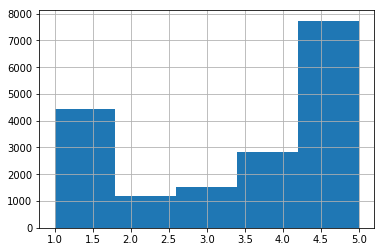

In [36]:
# Rating distribution
#target['star_rating'].hist(figsize=(15,10),bins=24)
target['star_rating'].hist(bins=5)

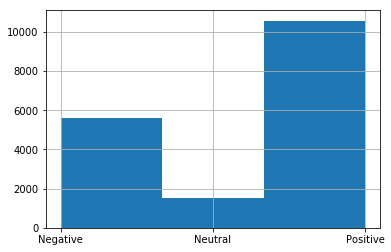

In [41]:
# Sentiment distribution
target['sentiment'].hist(bins=3)

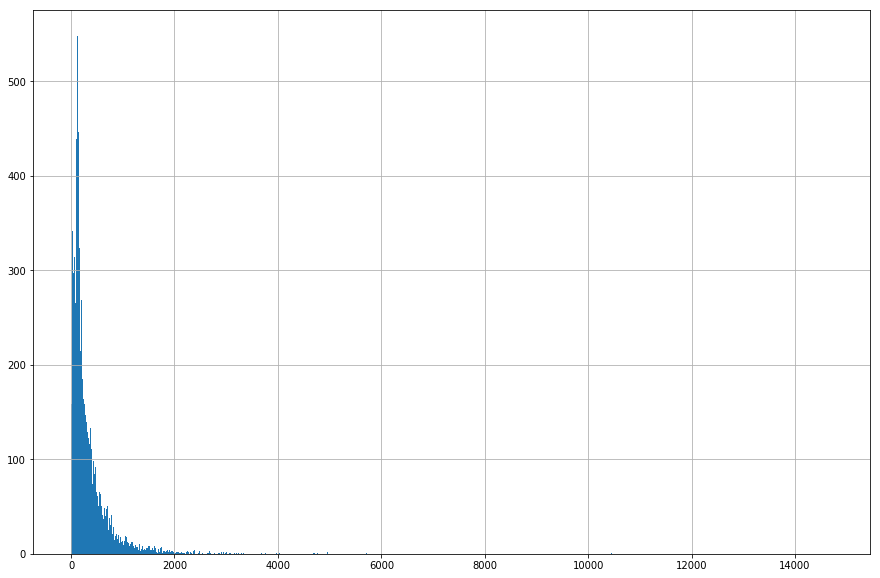

In [47]:
# Review body length distribution
target['length'].hist(figsize=(15,10),bins=2000)

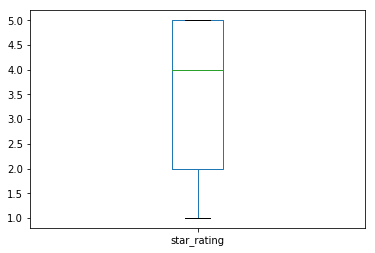

In [49]:
target['star_rating'].plot(kind="box")

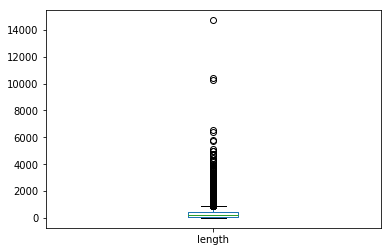

In [51]:
target['length'].plot(kind="box")

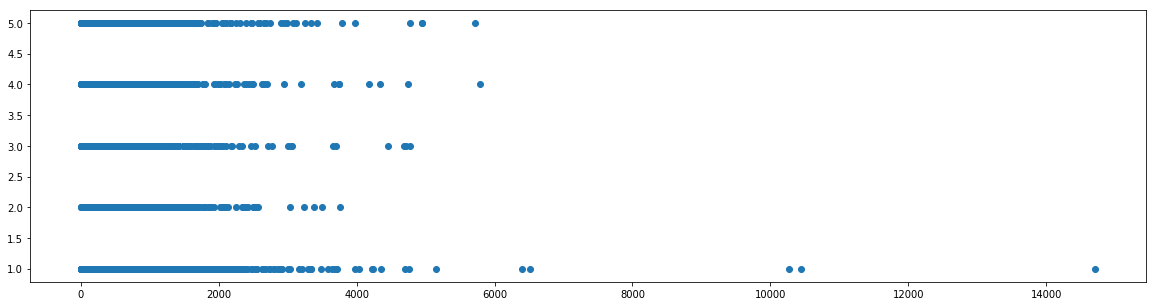

In [56]:
#sp=plt.scatter(target['star_rating'],target['sentiment'])
plt.figure(figsize=(20,5))
sp=plt.scatter(target['length'],target['star_rating'])